Figure 5: Barotropic Stream Function - CNTRL, Anom and Time-series

In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots

from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
import scipy.interpolate
import scipy.ndimage
#import seawater as sw
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean.cm as cmocean
from dask.distributed import Client


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
client = Client(n_workers=8)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46527,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:38695,Total threads: 1
Dashboard: /proxy/33067/status,Memory: 12.50 GiB
Nanny: tcp://127.0.0.1:41479,


In [3]:
vfile ='/g/data/hh5/tmp/pas561/mom01_unmasked_ocean_grid.nc'
vgrid01=xr.open_dataset(vfile)
vgrid01

<xarray.Dataset>
Dimensions:     (xt_ocean: 3600, yt_ocean: 2700, time: 1, xu_ocean: 3600,
                 yu_ocean: 2700)
Coordinates:
  * xt_ocean    (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean    (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
  * time        (time) object 0031-01-11 00:00:00
  * xu_ocean    (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean    (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
    geolon_t    (yt_ocean, xt_ocean) float32 ...
    geolat_t    (yt_ocean, xt_ocean) float32 ...
    geolon_c    (yu_ocean, xu_ocean) float32 ...
    geolat_c    (yu_ocean, xu_ocean) float32 ...
Data variables: (12/13)
    ht          (yt_ocean, xt_ocean) float32 ...
    hu          (yu_ocean, xu_ocean) float32 ...
    area_t      (yt_ocean, xt_ocean) float32 ...
    area_u      (yu_ocean, xu_ocean) float32 ...
    kmt         (yt_ocean, xt_ocean) float32 ...
    kmu         (yu_ocean, xu_ocean) float32 ...
    ...          ...
    dxt         (yt_ocean, xt_ocean) float32 ...
    dyt         (yt_ocean, xt_ocean) float32 ...
    dxu         (yu_ocean, xu_ocean) float32 ...
    dyu         (yu_ocean, xu_ocean) float32 ...
    f_coriolis  (yu_ocean, xu_ocean) float32 ...
    beta        (yu_ocean, xu_ocean) float32 ...
Attributes:
    filename:   ocean_grid.nc
    title:      MOM5_CORE_NYF_50lvl_comparison_test
    grid_type:  mosaic
    grid_tile:  1

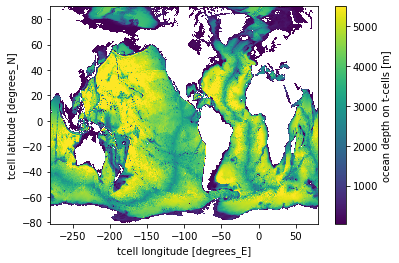

In [4]:
vgrid01.ht.plot()

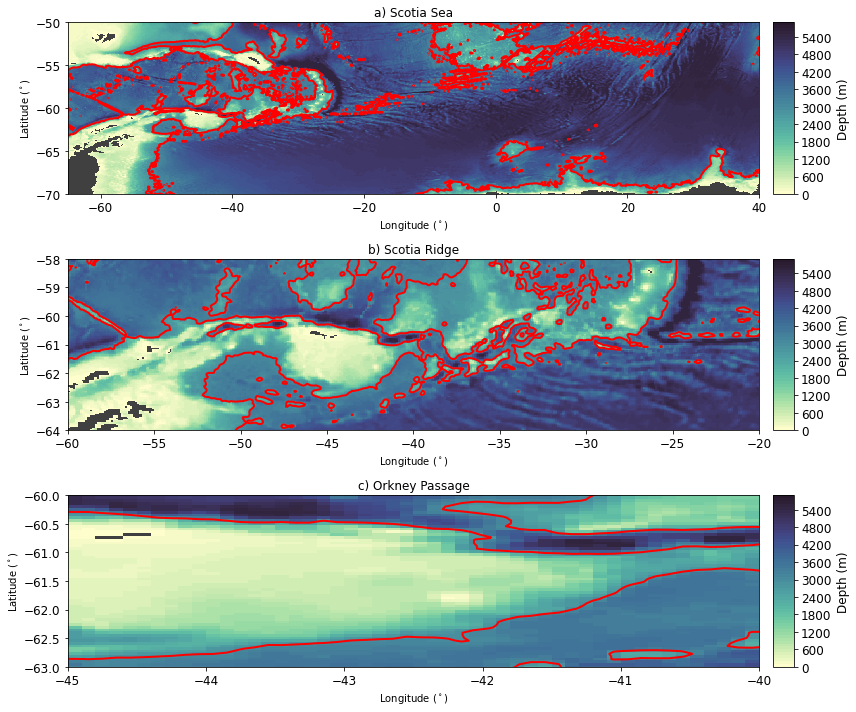

In [5]:
fontsize=12

plt.figure(figsize=(12,10))

clev2 = np.arange(0,6000,100)

plt.subplot(3,1,1)
plt.gca().patch.set_color('.25')
pc=vgrid01.ht.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=0, vmax=5500, levels=clev2,cmap=cmocean.deep,add_colorbar=False)
plt.contour(vgrid01.ht.xt_ocean,vgrid01.ht.yt_ocean,vgrid01.ht,levels=[3000],colors='r',linewidths=2)
plt.ylim((-70,-50))
#plt.yticks([-65, -62.5, -60, -57.5, -55])
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.xlim([-65,40])
plt.title('a) Scotia Sea',fontsize=fontsize)
#plt.xticks([-60, -40, -20, 0, 20, 40])
plt.tick_params(labelsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')

# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)


plt.subplot(3,1,2)
plt.gca().patch.set_color('.25')
pc=vgrid01.ht.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=0, vmax=5500, levels=clev2,cmap=cmocean.deep,add_colorbar=False)
plt.contour(vgrid01.ht.xt_ocean,vgrid01.ht.yt_ocean,vgrid01.ht,levels=[3000],colors='r',linewidths=2)
plt.ylim((-64,-58))
#plt.yticks([-61, -60.75, -61, -60.25, -60])
plt.xlim([-60,-20])
plt.title('b) Scotia Ridge',fontsize=fontsize)
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.tick_params(labelsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')

# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.subplot(3,1,3)
plt.gca().patch.set_color('.25')
pc=vgrid01.ht.plot.pcolormesh(x='xt_ocean', y='yt_ocean',vmin=0, vmax=5500, levels=clev2,cmap=cmocean.deep,add_colorbar=False)
plt.contour(vgrid01.ht.xt_ocean,vgrid01.ht.yt_ocean,vgrid01.ht,levels=[3000],colors='r',linewidths=2)
plt.ylim((-63,-60))
plt.xlim([-45,-40])
plt.title('c) Orkney Passage',fontsize=fontsize)
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Longitude ($^\circ$)')
plt.tick_params(labelsize=fontsize)
#plt.contourf(ht.xt_ocean, ht.yt_ocean,land_mask,colors='grey')

# colorbar:
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(pc, cax=cax,orientation = 'vertical',extend = 'neither')
cbar.set_label(r'Depth (m)',fontsize=fontsize,labelpad=5)
cbar.ax.tick_params(labelsize=fontsize)

plt.tight_layout()

In [67]:
#calculate volume transport in rho space across -61S and between -54W to -32W 
#or northward volume transport across 60S between 60W to 20W, between 1000-4000m and 4-6km depth 
NYFCntrlDir = '/g/data3/hh5/tmp/pas561/kds75_cp_ann/'
Ocean_File = os.path.join(NYFCntrlDir,'ocean_*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='time')#,decode_times=False)


/g/data3/hh5/tmp/pas561/kds75_cp_ann/ocean_*.nc


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [68]:
cntrl

<xarray.Dataset>
Dimensions:          (xt_ocean: 3600, yt_ocean: 1351, time: 42, nv: 2,
                      xu_ocean: 3600, yu_ocean: 1351, st_ocean: 75,
                      st_edges_ocean: 76, sw_ocean: 75, sw_edges_ocean: 76,
                      grid_xt_ocean: 3600, grid_yu_ocean: 2700, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/18)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean         (yt_ocean) float64 -81.11 -81.07 -81.02 ... 10.39 10.49
  * time             (time) object 0114-09-30 21:00:00 ... 0155-07-01 15:00:00
  * nv               (nv) float64 1.0 2.0
  * xu_ocean         (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean         (yu_ocean) float64 -81.09 -81.05 -81.0 ... 10.44 10.54
    ...               ...
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
    geolon_t         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
    geolat_t         (yt_ocean, xt_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
    geolon_c         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
    geolat_c         (yu_ocean, xu_ocean) float32 dask.array<chunksize=(1351, 3600), meta=np.ndarray>
Data variables: (12/22)
    temp             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    salt             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    age_global       (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    u                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    v                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    sea_level        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1351, 3600), meta=np.ndarray>
    ...               ...
    ty_trans_rho     (time, potrho, grid_yu_ocean, grid_xt_ocean) float32 dask.array<chunksize=(1, 80, 2700, 3600), meta=np.ndarray>
    diff_cbt_t       (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 75, 1351, 3600), meta=np.ndarray>
    average_T1       (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds      (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean.nc
    title:      MOM4p1_CORE_IAF_v20120531_0849_noRestore_runoff_fix
    grid_type:  mosaic
    grid_tile:  1
    history:    Tue Feb 12 15:32:02 2019: ncra -d yt_ocean,0,1350 -d yu_ocean...
    NCO:        netCDF Operators version 4.7.7 (Homepage = http://nco.sf.net,...

In [69]:
cntrl.ty_trans

<xarray.DataArray 'ty_trans' (time: 42, st_ocean: 75, yu_ocean: 1351,
                              xt_ocean: 3600)>
dask.array<concatenate, shape=(42, 75, 1351, 3600), dtype=float32, chunksize=(1, 75, 1351, 3600), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * time      (time) object 0114-09-30 21:00:00 ... 0155-07-01 15:00:00
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 ... 10.34 10.44 10.54
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03
Attributes:
    long_name:      T-cell j-mass transport
    units:          Sv (10^9 kg/s)
    valid_range:    [-1.e+20  1.e+20]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  ocean_y_mass_transport

In [70]:
psi= cntrl.ty_trans.sum('xt_ocean')
#psi = psi / (1e6*rho) # converts kg/s to Sv
psi = psi.cumsum('st_ocean').compute()
print(psi.shape)
cntrl_moc=psi

(42, 75, 1351)


In [71]:
cntrl_moc_avg=cntrl_moc.mean(dim='time').compute()
cntrl_moc_avg

<xarray.DataArray 'ty_trans' (st_ocean: 75, yu_ocean: 1351)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.489018  ,
         0.49077085,  0.49473318],
       [ 0.        ,  0.        ,  0.        , ...,  1.2062223 ,
         1.2121333 ,  1.2224703 ],
       [ 0.        ,  0.        ,  0.        , ...,  2.0994635 ,
         2.1112294 ,  2.129845  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.18590538,
        -0.13310643, -0.12282888],
       [ 0.        ,  0.        ,  0.        , ...,  0.08403414,
         0.08873797,  0.09296641],
       [ 0.        ,  0.        ,  0.        , ...,  0.08403414,
         0.08873797,  0.09296641]], dtype=float32)
Coordinates:
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 ... 10.34 10.44 10.54
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03

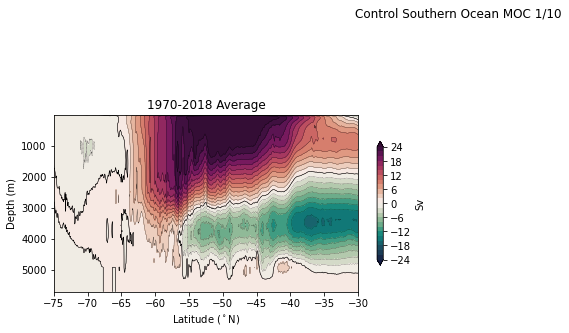

In [72]:
#fig,ax = plt.subplots(2,2,figsize=(10, 5)) 
plt.figure(figsize=(15,15))
plt.suptitle('Control Southern Ocean MOC 1/10')

plt.subplot(4,2,1)
ax = plt.gca()
clev = np.arange(-24,26,2)
scfac = 1  ## A power to set teh stretching

p1=ax.contourf(cntrl_moc_avg.yu_ocean,cntrl_moc_avg.st_ocean, cntrl_moc_avg, cmap=cmocean.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical', shrink = 0.7)
    
cb.ax.set_ylabel('Sv')
ax.contour(cntrl_moc_avg.yu_ocean,cntrl_moc_avg.st_ocean, cntrl_moc_avg, levels=clev, colors='k', linewidths=0.25)
ax.contour(cntrl_moc_avg.yu_ocean,cntrl_moc_avg.st_ocean, cntrl_moc_avg, levels=[0.0,], colors='k', linewidths=0.5)

#ax.set_yticks((yticks-1028)**scfac)
#ax.set_yticklabels(yticks)
#ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,-30])
ax.set_title('1970-2018 Average');

In [73]:
depth_min=3000

In [97]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-30)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl01_60to30=tmp.compute()

In [98]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl01_60to20=tmp.compute()

In [99]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-10)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl01_60to10=tmp.compute()

In [100]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,0)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl01_60to0=tmp.compute()

In [101]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl01_60to20E=tmp.compute()

In [102]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,60)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp[:-1].compute()

In [80]:
#calculate volume transport in rho space across -61S and between -54W to -32W 
#or northward volume transport across 60S between 60W to 20W, between 1000-4000m and 4-6km depth 
NYFPertDir = '/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/'

Ocean_File = os.path.join(NYFPertDir,'ocean_*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='time')#,decode_times=False)

/g/data3/hh5/tmp/pas561/kds75_wp2/2yr/ocean_*.nc


/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [103]:
tmp=pert.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,60)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') # converts kg/s to Sv ... already in SV
pert_trans=tmp.compute()

In [104]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-30)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert01_60to30=tmp.compute()

In [105]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert01_60to20=tmp.compute()

In [106]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-10)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert01_60to10=tmp.compute()

In [107]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,0)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert01_60to0=tmp.compute()

In [108]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert01_60to20E=tmp.compute()

In [109]:
pert01_60to30.shape

(41,)

In [110]:
cntrl01_60to30.shape

(42,)

In [111]:
yrs=np.arange(1973,2015,1)
yrs.shape

(42,)

In [112]:
a=pert01_60to30-cntrl01_60to30
a.shape

(41,)

In [113]:
yrs[1:].shape

(41,)

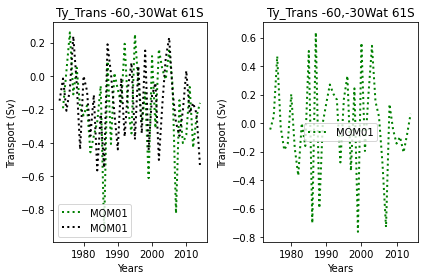

In [114]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to30,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to30,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to30-cntrl01_60to30,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

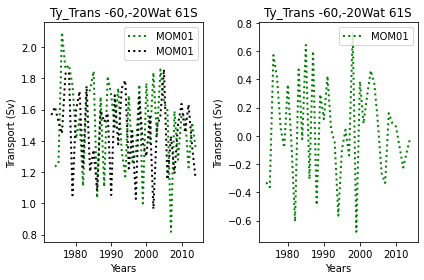

In [115]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to20,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to20,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to20-cntrl01_60to20,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

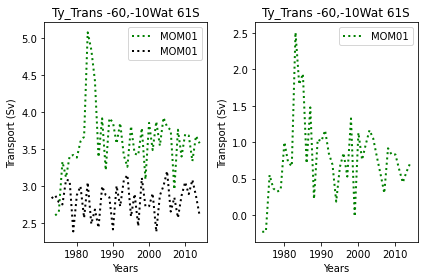

In [116]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to10,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to10,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to10-cntrl01_60to10,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

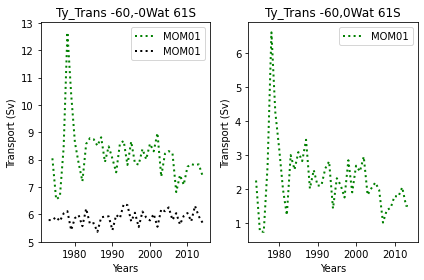

In [117]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to0,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to0,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-0Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to0-cntrl01_60to0,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,0Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


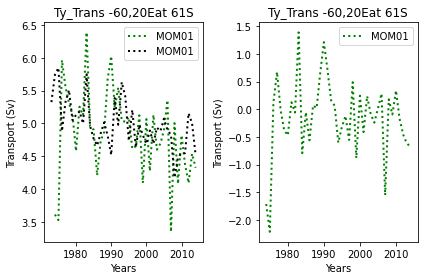

In [118]:
plt.subplot(121)
plt.plot(yrs[1:],pert01_60to20E,linestyle=':',color='g',linewidth=2,label='MOM01')
plt.plot(yrs,cntrl01_60to20E,linestyle=':',color='k',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20Eat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert01_60to20E-cntrl01_60to20E,linestyle=':',color='g',linewidth=2,label='MOM01')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20Eat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

In [119]:
NYFCntrlDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z/output*'
NYFCntrlDir1 = '/g/data/v45/pas561/mom/archive/wombat_jun16z/Tdim_output*'
#this has 3 years of a wind perturbation - get a nice 3 year polynya.
NYFPertDir = '/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/'

In [120]:
Ocean_File = os.path.join(NYFCntrlDir1,'ocean__*.nc')
print(Ocean_File)
cntrl1=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='time')#,decode_times=False)
cntrl1

/g/data/v45/pas561/mom/archive/wombat_jun16z/Tdim_output*/ocean__*.nc


<xarray.Dataset>
Dimensions:          (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                      st_edges_ocean: 51, time: 11, nv: 2, xu_ocean: 1440,
                      yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                      grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/13)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean         (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * nv               (nv) float64 1.0 2.0
  * xu_ocean         (xu_ocean) float64 -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
    ...               ...
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean    (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * grid_yu_ocean    (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Dimensions without coordinates: time
Data variables: (12/20)
    Time             (time) object dask.array<chunksize=(1,), meta=np.ndarray>
    temp             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt             (time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v                (time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w                (time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...               ...
    mld              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds      (time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1971_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1
    history:    Wed Dec  6 15:07:51 2017: ncrename -d Time,time output1972/oc...
    NCO:        "4.6.4"

In [121]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean__*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
cntrl

/g/data/v45/pas561/mom/archive/wombat_jun16z/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:         (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                     st_edges_ocean: 51, Time: 48, nv: 2, xu_ocean: 1440,
                     yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                     grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                     potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean        (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean        (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time            (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
  * nv              (nv) float64 1.0 2.0
    ...              ...
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean  (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean   (grid_xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * grid_yu_ocean   (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho          (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * potrho_edges    (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/16)
    temp            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w               (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0       (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...              ...
    mld             (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t          (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT      (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds     (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1980_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [122]:
tmp=cntrl1.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-30)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean')
cntrl1_trans=tmp.compute()

In [123]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-30)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [124]:
cntrl025_60to30=np.append(cntrl1_trans[2:],cntrl_trans)
cntrl025_60to30

array([1.0942624 , 1.0648098 , 1.1143861 , 1.0596725 , 1.08212   ,
       1.0436051 , 1.0912704 , 1.0835962 , 1.0835962 , 1.0894343 ,
       1.1179634 , 1.0753464 , 1.0838853 , 1.08483   , 1.113409  ,
       1.0606121 , 1.101577  , 1.0587096 , 1.0856695 , 1.0708876 ,
       1.046871  , 1.0559796 , 1.082032  , 1.0764642 , 0.9933429 ,
       1.0357205 , 1.0283716 , 1.0896916 , 1.0124362 , 1.0393803 ,
       1.0154549 , 0.94567674, 1.0013088 , 1.0034546 , 0.97928584,
       1.0607016 , 1.0533452 , 1.0905445 , 1.0500636 , 1.0955433 ,
       1.0264472 , 1.0129197 , 1.0543    , 1.0180234 , 1.0200969 ,
       1.0698516 , 1.0203376 , 1.0567131 , 1.0307574 , 1.0700829 ,
       1.0389991 , 1.0108886 , 1.060483  , 1.0254487 , 1.0207361 ,
       1.0658004 , 1.0307724 ], dtype=float32)

In [125]:
tmp=cntrl1.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean')
cntrl1_trans=tmp.compute()

In [126]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [127]:
cntrl025_60to20=np.append(cntrl1_trans[2:],cntrl_trans)
cntrl025_60to20

array([2.161544 , 2.0749266, 2.2474341, 2.1582735, 2.1317096, 2.0742154,
       2.1728466, 2.1564245, 2.1564245, 2.1791964, 2.2224827, 2.131041 ,
       2.0921714, 2.1356392, 2.1906543, 2.1474092, 2.187868 , 2.0733662,
       2.1593566, 2.1232157, 2.1685529, 2.1416664, 2.2534966, 2.1627898,
       1.9422104, 2.1598177, 2.1436934, 2.2443757, 2.059328 , 2.1995373,
       2.1677916, 1.9862802, 2.0918727, 2.1579065, 2.0761924, 2.1551573,
       2.228006 , 2.1494632, 2.126655 , 2.239372 , 2.113225 , 2.0807374,
       2.1886902, 2.1044936, 2.229395 , 2.1383867, 2.0915859, 2.141331 ,
       2.1497624, 2.181035 , 2.2295086, 2.1135597, 2.1365435, 2.137133 ,
       2.0815191, 2.1974344, 2.201632 ], dtype=float32)

In [128]:
tmp=cntrl1.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-10)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean')
cntrl1_trans=tmp.compute()

In [129]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-10)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [130]:
cntrl025_60to10=np.append(cntrl1_trans[2:],cntrl_trans)
cntrl025_60to10

array([3.3332202, 3.248806 , 3.3843594, 3.287908 , 3.2769017, 3.2105098,
       3.2842484, 3.2594326, 3.2594326, 3.2761292, 3.3189878, 3.2324553,
       3.2035675, 3.2240252, 3.279354 , 3.240353 , 3.2740383, 3.176015 ,
       3.2448838, 3.215013 , 3.2479517, 3.2239642, 3.3030195, 3.2372954,
       3.0493836, 3.2072425, 3.1887653, 3.2779615, 3.1169698, 3.2153077,
       3.1792135, 3.0216641, 3.1343904, 3.1873398, 3.1208081, 3.210897 ,
       3.2776408, 3.2462096, 3.2362914, 3.3386817, 3.2493668, 3.2080734,
       3.3048148, 3.2340107, 3.308807 , 3.2509706, 3.2125745, 3.2646954,
       3.2518594, 3.2847157, 3.318606 , 3.2271538, 3.2666252, 3.2532692,
       3.2011838, 3.314188 , 3.2991912], dtype=float32)

In [131]:
tmp=cntrl1.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,0)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean')
cntrl1_trans=tmp.compute()

In [132]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,0)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [133]:
cntrl025_60to0=np.append(cntrl1_trans[2:],cntrl_trans)
cntrl025_60to0

array([4.428281 , 4.3304677, 4.5157075, 4.430073 , 4.4531245, 4.3890305,
       4.482398 , 4.458796 , 4.458796 , 4.5026517, 4.5633817, 4.4560676,
       4.4257197, 4.4320207, 4.504801 , 4.46536  , 4.498828 , 4.4090023,
       4.5023904, 4.469802 , 4.4969215, 4.4657683, 4.5775967, 4.554832 ,
       4.358365 , 4.5238357, 4.5179834, 4.6309357, 4.4779825, 4.5602083,
       4.54199  , 4.3866324, 4.517785 , 4.528046 , 4.416676 , 4.4974995,
       4.5783453, 4.556118 , 4.5448937, 4.6518836, 4.5801616, 4.5394855,
       4.6458244, 4.5650887, 4.6463866, 4.6178455, 4.603439 , 4.64027  ,
       4.6009574, 4.6415834, 4.681224 , 4.6067934, 4.65166  , 4.625815 ,
       4.554013 , 4.6740737, 4.658572 ], dtype=float32)

In [134]:
tmp=cntrl1.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean')
cntrl1_trans=tmp.compute()

In [135]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [136]:
cntrl025_60to20E=np.append(cntrl1_trans[2:],cntrl_trans)
cntrl025_60to20E

array([6.8672857, 6.7264175, 6.9343157, 6.77771  , 6.8549223, 6.7605996,
       6.846834 , 6.7688217, 6.7688217, 6.7679653, 6.8636928, 6.7611756,
       6.8051624, 6.714707 , 6.8295712, 6.7956057, 6.770855 , 6.701329 ,
       6.804855 , 6.7864513, 6.857905 , 6.84188  , 6.870957 , 6.8907266,
       6.6186743, 6.759317 , 6.806545 , 6.926969 , 6.7956047, 6.831069 ,
       6.7605715, 6.659383 , 6.940514 , 6.9121914, 6.7482915, 6.7282677,
       6.878764 , 6.79808  , 6.810824 , 6.7821684, 6.8766456, 6.6271753,
       6.852122 , 6.7831388, 6.755512 , 6.750998 , 6.8119373, 6.8822927,
       6.7706165, 6.833709 , 6.8340607, 6.769743 , 6.858588 , 6.792839 ,
       6.657033 , 6.920015 , 6.823996 ], dtype=float32)

In [137]:
Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
pert

/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:          (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                      st_edges_ocean: 51, Time: 51, nv: 2, xu_ocean: 1440,
                      yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                      grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean         (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time             (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
  * nv               (nv) float64 1.0 2.0
    ...               ...
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean    (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * grid_yu_ocean    (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/19)
    temp             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w                (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0        (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...               ...
    mld              (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t           (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds      (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1973_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [138]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-30)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert025_60to30=tmp.compute()

In [139]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert025_60to20=tmp.compute()

In [140]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,-10)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert025_60to10=tmp.compute()

In [141]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,0)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert025_60to0=tmp.compute()

In [142]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert025_60to20E=tmp.compute()

In [143]:
yrs=np.arange(1973,2015,1)
yrs.shape

(42,)

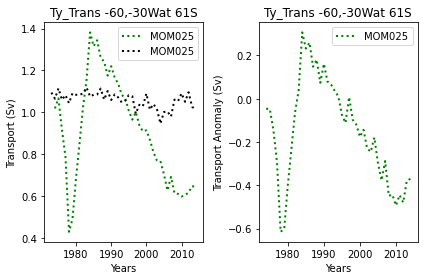

In [144]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to30[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to30[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to30[:41]-cntrl025_60to30[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-30Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


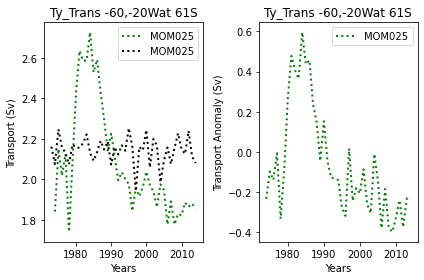

In [145]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to20[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to20[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to20[:41]-cntrl025_60to20[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-20Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


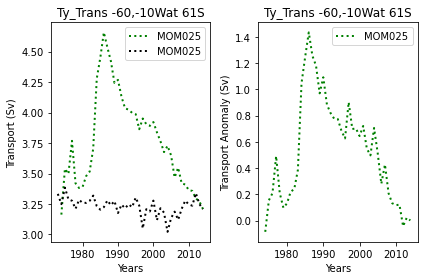

In [146]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to10[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to10[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to10[:41]-cntrl025_60to10[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,-10Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


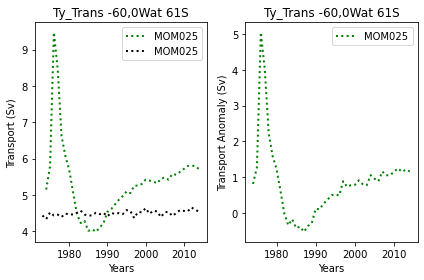

In [147]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to0[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to0[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,0Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to0[:41]-cntrl025_60to0[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,0Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()


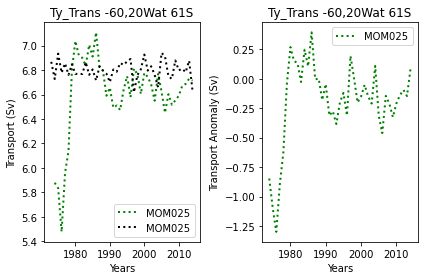

In [148]:
plt.subplot(121)
plt.plot(yrs[1:],pert025_60to20E[:41],linestyle=':',color='g',linewidth=2,label='MOM025')
plt.plot(yrs,cntrl025_60to20E[:42],linestyle=':',color='k',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)

plt.subplot(122)
plt.plot(yrs[1:],pert025_60to20E[:41]-cntrl025_60to20E[1:42],linestyle=':',color='g',linewidth=2,label='MOM025')
#plt.xlim((1037.5,1035))
plt.ylabel('Transport Anomaly (Sv)')
plt.xlabel('Years')
#plt.xlim([1973,1973+12])
tit='Ty_Trans -60,20Wat 61S'
plt.title(tit)
plt.legend(fontsize=10)


plt.tight_layout()

In [149]:
yrs[0:41]

array([1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

In [151]:
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert025_60to20E',pert025_60to20E)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl025_60to20E',cntrl025_60to20E)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert025_60to10',pert025_60to10)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl025_60to10',cntrl025_60to10)

In [152]:
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert01_60to20E',pert01_60to20E)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl01_60to20E',cntrl01_60to20E)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_pert01_60to10',pert01_60to10)
np.save('/g/data/jk72/pas561/jnb/WedPolyFinal/ty_trans_cntrl01_60to10',cntrl01_60to10)

In [73]:
Ocean_File = os.path.join(NYFCntrlDir,'ocean__*.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
cntrl

/g/data/v45/pas561/mom/archive/wombat_jun16z/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:         (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                     st_edges_ocean: 51, Time: 48, nv: 2, xu_ocean: 1440,
                     yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                     grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                     potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean        (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean        (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time            (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
  * nv              (nv) float64 1.0 2.0
    ...              ...
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean  (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean   (grid_xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * grid_yu_ocean   (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho          (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * potrho_edges    (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/16)
    temp            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt            (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v               (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w               (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0       (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...              ...
    mld             (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t          (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2      (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT      (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds     (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1980_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [ ]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [45]:
psi= cntrl.ty_trans.sum('xt_ocean')
#psi = psi / (1e6*rho) # converts kg/s to Sv
psi = (psi.cumsum('st_ocean') - psi.sum('st_ocean')).compute()
print(psi.shape)
cntrl_moc=psi

(48, 80, 1080)


In [47]:
cntrl_moc_avg=cntrl_moc.mean(dim='Time').compute()
cntrl_moc_avg

<xarray.DataArray 'ty_trans_rho' (potrho: 80, grid_yu_ocean: 1080)>
array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.4365923e-04,  1.3652776e-03, -1.0794979e-05],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.7344253e-03,  8.3354750e-04, -6.2889740e-05],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -2.3766020e-03,  5.8724248e-04,  1.5384244e-04],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho         (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03 1.038e+03

/jobfs/67419500.gadi-pbs/ipykernel_80247/2451697041.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks)


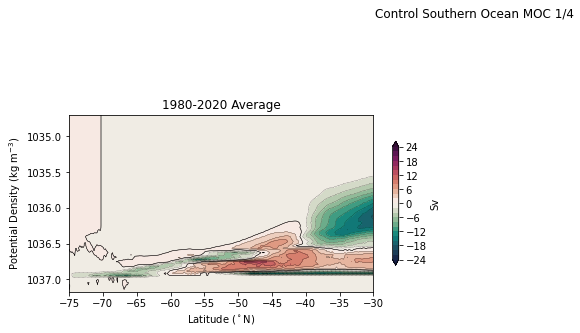

In [48]:
#fig,ax = plt.subplots(2,2,figsize=(10, 5)) 
plt.figure(figsize=(15,15))
plt.suptitle('Control Southern Ocean MOC 1/4')

plt.subplot(4,2,1)
ax = plt.gca()
clev = np.arange(-24,26,2)
yticks = np.array([1033, 1035, 1035.5, 1036,1036.5, 1037,1037.5])
scfac = 8  ## A power to set teh stretching

p1=ax.contourf(cntrl_moc_avg.yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, cmap=cmocean.curl, levels=clev, extend='both')
cb=plt.colorbar(p1,orientation='vertical', shrink = 0.7)
    
cb.ax.set_ylabel('Sv')
ax.contour(cntrl_moc_avg.yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, levels=clev, colors='k', linewidths=0.25)
ax.contour(cntrl_moc_avg.yu_ocean,cntrl_moc_avg.potrho**scfac, cntrl_moc_avg, levels=[0.0,], colors='k', linewidths=0.5)

#ax.set_yticks((yticks-1028)**scfac)
ax.set_yticklabels(yticks)
#ax.set_ylim([0.5**scfac, 9.2**scfac])
ax.invert_yaxis()
ax.set_ylabel('Potential Density (kg m$^{-3}$)')
ax.set_xlabel('Latitude ($^\circ$N)')
ax.set_xlim([-75,-30])
ax.set_title('1980-2020 Average');

In [ ]:
cntrl.potrho

In [49]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [50]:
tmp=cntrl.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
cntrl_trans=tmp.compute()

In [51]:
cntrl_trans

<xarray.DataArray 'ty_trans_rho' (Time: 48)>
array([50.654682, 50.928806, 50.719776, 50.8966  , 50.592106, 50.82135 ,
       51.11166 , 50.747864, 50.606842, 50.73503 , 50.88282 , 51.063248,
       50.88617 , 50.954376, 50.930473, 50.357468, 50.454334, 50.78927 ,
       50.83275 , 50.552498, 50.544556, 50.331017, 50.6779  , 51.106804,
       51.238503, 51.07387 , 50.48225 , 51.186974, 50.946877, 51.09658 ,
       50.812473, 51.358795, 50.85157 , 51.151684, 51.074547, 51.09223 ,
       50.879448, 51.274887, 51.306057, 51.12452 , 51.122902, 51.23857 ,
       51.099762, 51.299717, 51.15966 , 50.974224, 51.509647, 51.20529 ],
      dtype=float32)
Coordinates:
  * Time           (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
    grid_yu_ocean  float64 -60.52

In [52]:
cntrl_trans

<xarray.DataArray 'ty_trans' (Time: 48)>
array([3.8558836, 3.8791418, 3.8519027, 3.8639965, 3.8337474, 3.8666203,
       3.874693 , 3.837777 , 3.8281767, 3.8593237, 3.860783 , 3.899861 ,
       3.8861575, 3.8815308, 3.896889 , 3.805546 , 3.8641698, 3.9108949,
       3.9309368, 3.9133306, 3.9169042, 3.9033842, 3.9025817, 4.012135 ,
       3.9881425, 3.9188576, 3.8556511, 3.9203873, 3.8663447, 3.877121 ,
       3.8297195, 3.8995743, 3.7859535, 3.8732855, 3.849861 , 3.8375194,
       3.8072996, 3.8488176, 3.864532 , 3.8196492, 3.8308926, 3.8413272,
       3.8029919, 3.8344915, 3.8105135, 3.7600148, 3.863265 , 3.809352 ],
      dtype=float32)
Coordinates:
  * Time      (Time) object 1980-07-02 12:00:00 ... 2027-07-02 12:00:00
    yu_ocean  float64 -60.52

In [56]:
Ocean_File = os.path.join(NYFPertDir,'output*/ocean__*.nc')
print(Ocean_File)
pert=xr.open_mfdataset(Ocean_File,engine='netcdf4',combine='nested',concat_dim='Time')#,decode_times=False)
pert

/g/data/v45/pas561/mom/archive/wombat_jun16z_wp2_74/output*/ocean__*.nc


<xarray.Dataset>
Dimensions:          (xt_ocean: 1440, yt_ocean: 1080, st_ocean: 50,
                      st_edges_ocean: 51, Time: 51, nv: 2, xu_ocean: 1440,
                      yu_ocean: 1080, sw_ocean: 50, sw_edges_ocean: 51,
                      grid_xt_ocean: 1440, grid_yu_ocean: 1080, potrho: 80,
                      potrho_edges: 81)
Coordinates: (12/14)
  * xt_ocean         (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.62 79.88
  * yt_ocean         (yt_ocean) float64 -81.08 -80.97 -80.87 ... 89.84 89.95
  * st_ocean         (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * st_edges_ocean   (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * Time             (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
  * nv               (nv) float64 1.0 2.0
    ...               ...
  * sw_ocean         (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * sw_edges_ocean   (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * grid_xt_ocean    (grid_xt_ocean) float64 -279.9 -279.6 ... 79.62 79.88
  * grid_yu_ocean    (grid_yu_ocean) float64 -81.02 -80.92 -80.81 ... 89.89 90.0
  * potrho           (potrho) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
Data variables: (12/19)
    temp             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    salt             (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    u                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    v                (Time, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    w                (Time, sw_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    pot_rho_0        (Time, st_ocean, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 50, 1080, 1440), meta=np.ndarray>
    ...               ...
    mld              (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    pbot_t           (Time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 1080, 1440), meta=np.ndarray>
    average_T1       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_T2       (Time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    average_DT       (Time) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    Time_bounds      (Time, nv) timedelta64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean__1973_07.nc
    title:      mom5_0p25global_bgc
    grid_type:  mosaic
    grid_tile:  1

In [61]:
tmp=pert.ty_trans.sel(st_ocean=slice(depth_min,5500),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert_trans=tmp.compute()

In [62]:
tmp=pert.ty_trans.sel(st_ocean=slice(4000,6000),xt_ocean=slice(-60,20)).sel(yu_ocean=-60,method='nearest')
tmp=tmp.sum('st_ocean').sum('xt_ocean') 
pert_trans=tmp.compute()

In [63]:
pert_trans

<xarray.DataArray 'ty_trans_rho' (Time: 51)>
array([50.31534 , 51.016163, 51.339775, 51.471085, 51.633102, 51.766373,
       51.92438 , 51.8585  , 52.836796, 52.918884, 53.273106, 53.04664 ,
       53.367073, 53.182068, 53.12873 , 52.90313 , 53.264046, 53.51503 ,
       54.020622, 54.175735, 54.56469 , 55.031673, 54.124756, 54.579865,
       54.392303, 53.627663, 54.072575, 53.87467 , 53.90967 , 53.39302 ,
       54.16694 , 53.726852, 53.190903, 53.48343 , 53.309174, 53.429104,
       53.397324, 53.661026, 53.590504, 53.8188  , 53.8408  , 54.208656,
       53.833363, 53.789803, 54.151306, 54.310226, 54.077435, 53.822586,
       53.71425 , 54.687298, 56.34602 ], dtype=float32)
Coordinates:
  * Time           (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
    grid_yu_ocean  float64 -60.52

In [64]:
pert_trans

<xarray.DataArray 'ty_trans' (Time: 51)>
array([3.2401805, 3.2473483, 3.1361208, 3.5932488, 3.9276364, 4.4663734,
       4.7555585, 4.7793465, 4.666038 , 4.481869 , 4.3269715, 4.1493316,
       4.1116843, 3.9394846, 3.8675   , 3.7381516, 3.7181067, 3.6563447,
       3.6352203, 3.58083  , 3.5867794, 3.607028 , 3.4731257, 3.5228367,
       3.482677 , 3.39798  , 3.451637 , 3.4300532, 3.4070563, 3.3454032,
       3.448417 , 3.3718047, 3.289587 , 3.3253512, 3.312221 , 3.3301575,
       3.343801 , 3.3925068, 3.4088244, 3.4243665, 3.4303613, 3.5209029,
       3.457423 , 3.4662743, 3.5139947, 3.5102496, 3.4796312, 2.896391 ,
       2.7776423, 2.6753798, 2.6371264], dtype=float32)
Coordinates:
  * Time      (Time) object 1973-07-02 12:00:00 ... 2023-07-02 12:00:00
    yu_ocean  float64 -60.52

In [65]:
anom=pert_trans-cntrl_trans
anom

<xarray.DataArray 'ty_trans_rho' (Time: 44)>
array([1.2038193, 1.9079895, 2.1991081, 2.3765068, 2.4545326, 2.545723 ,
       2.0704079, 2.380867 , 2.2962875, 2.5290146, 2.6322098, 2.9573746,
       3.289566 , 3.6103134, 4.1012   , 3.7672882, 4.1255302, 3.603035 ,
       2.7949142, 3.5200768, 3.3301125, 3.5786552, 2.7151222, 3.060135 ,
       2.48835  , 2.117031 , 3.0011787, 2.1222   , 2.4822273, 2.300743 ,
       2.8485527, 2.2317085, 2.9672318, 2.6891174, 3.1341095, 2.7411308,
       2.9103546, 2.876419 , 3.0041695, 2.9529152, 2.6996841, 2.4756775,
       3.5875359, 5.046303 ], dtype=float32)
Coordinates:
  * Time           (Time) object 1980-07-02 12:00:00 ... 2023-07-02 12:00:00
    grid_yu_ocean  float64 -60.52

In [66]:
anom=pert_trans-cntrl_trans
anom

<xarray.DataArray 'ty_trans' (Time: 44)>
array([ 0.92346287,  0.7868962 ,  0.6299665 ,  0.46297503,  0.31558418,
        0.24506402,  0.06479168,  0.02972317, -0.09002519, -0.141217  ,
       -0.20443845, -0.2646408 , -0.30532742, -0.2947514 , -0.28986096,
       -0.33242035, -0.34133315, -0.4282179 , -0.53295684, -0.46169353,
       -0.48685098, -0.49632788, -0.5571785 , -0.5637181 , -0.6163378 ,
       -0.62927055, -0.5302999 , -0.6081662 , -0.5361872 , -0.53331995,
       -0.4372127 , -0.49074984, -0.36158705, -0.44292426, -0.32895803,
       -0.38009644, -0.34102535, -0.3348229 , -0.35428238, -0.34001803,
       -0.93450165, -1.0636849 , -1.1276121 , -1.197365  ], dtype=float32)
Coordinates:
  * Time      (Time) object 1980-07-02 12:00:00 ... 2023-07-02 12:00:00
    yu_ocean  float64 -60.52